# Preparing the Titanic dataset

In this exercise we need to prepare the Titanic dataset for the upcoming tasks in supervised learning. With two algorithms we want to classify or predict wether a passenger of the titanic survived or not. First of all we need to load the necessary libraries which will help us to explore and visualize the data. Therefore we will use panda dataframes a lot.

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter

from typing import *

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Load the Titanic dataset (train and test) with pandas
<li> Display the first 5 rows of the train dataset
</li>
</ul>
</div>

In [201]:
# Load the train and test datasets from the CSV files

train: pd.DataFrame
test: pd.DataFrame

# STUDENT CODE HERE (1pt)
filename_tr="data/train.csv"
train= pd.read_csv(filename_tr)
filename_te="data/test.csv"
test=pd.read_csv(filename_te)
train.head(5)

# STUDENT CODE until HERE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
# Combines both datasets in a list that can be iterated over in the following data preparation
datasets = [train, test]

# Display the first 5 rows of the train dataset
# STUDENT CODE HERE  (1pt) 
datasets[0][0:5]
# STUDENT CODE until HERE

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
type(train['Fare'][1])

numpy.float64

In [204]:
# Print the columns of the data frame
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<div class="alert alert-block alert-success">
<b>Question:</b> What do you see when we print the column names and how can you interpret them? Describe the features! Make note of any informations about the features, that are important for preprocessing the data!
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b>PassengerId : number of the passenger equals number of row +1, Survived the crash or not (1 or 0), class of the passenger(1,2,3) 1 is best 3 is worst, name of the passenger, sex of the passenger(string), age of the passenger(float), the number of siblings and spouses, number of parents children abroad the ship, ticket number, price of the ticket(float), number of the cabin, port of embarkation. The important features are : Survived, Pclass, Name, Sex, Age, Fare </div>

In [205]:
# Inspect the data, *info* can be used to show how complete or incomplete the
# dataset is
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-block alert-success">
<b>Question:</b>  What do you see when you look at the dataset? Which irregularities within the dataset are important to know, when preparing the data?
</div>
<div class="alert alert-block alert-success">
<b>Answer:</b> In the cabin feature there are only 204 entrys, age only got 714 entrys, Embarked only got 889 entrys. There are also some objects and some floats in the data.</div>

## Task 1.1: Visualizing the Data 

After investigating the tables and the description of the titanic dataset we cannot say a lot about the data yet. We do not have any information about the distribution and correlation of variables with respect to the individual chances of survival. In order to get a better understanding of the dataset, it is beneficial to visualize it.

A well kown tool to visualize data using Python is the library *matplotlib*. It is well [documented](https://matplotlib.org/) and allows for extensive customizability. (You used it already.)

Additionally we will introduce [*seaborn*](https://seaborn.pydata.org/), a wrapper which uses matplotlib, but offers a higher-level interface for visualizing data.

<div class="alert alert-block alert-info">
<b>Note:</b> With the first 3 plots we want to investigate:
<ul>
<li> How many passenger of the titanic survived the tragedy
<li>  The total number of passengers with respect to its class
<li>  The passengers sorted by their ages
</li>
</ul>
</div>

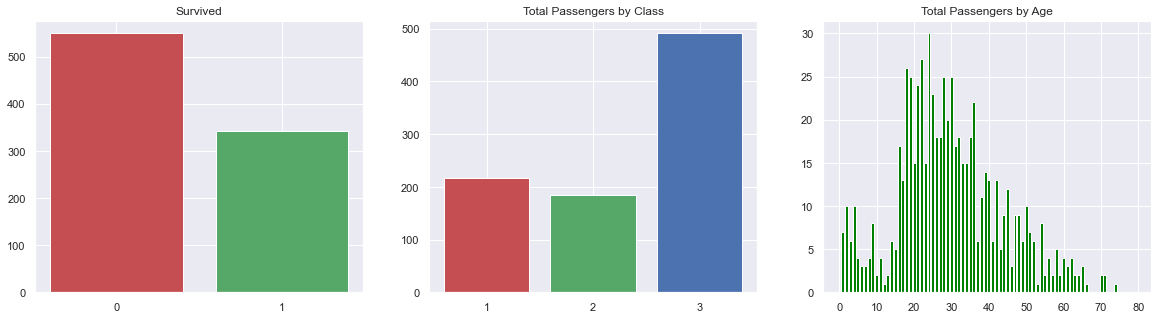

In [206]:
# First we start off with matplotlib and setup the figures and plots
f,ax = plt.subplots(1,3,figsize=(20,5))
colors = ['r', 'g', 'b']

# Now we look at some general distributions of the data.

# Survived Class
x_survived = [0,1]
y_survived = [np.where(train['Survived'] == (i))[0].size for i in x_survived]
ax[0].bar(x_survived, y_survived, color=colors)
ax[0].set_xticks(x_survived)
ax[0].set_title('Survived')


# Passenger Class
x_pclass = [1, 2, 3]
y_pclass = [np.where(train['Pclass'] == (i))[0].size for i in x_pclass]
ax[1].bar(x_pclass, y_pclass, color=colors)
ax[1].set_xticks(x_pclass)
ax[1].set_title('Total Passengers by Class')


# Age
x_age = np.arange(0, 80)
y_age = [np.where(train['Age'] == (i))[0].size for i in x_age]
ax[2].bar(x_age, y_age, color='green')
ax[2].set_xticks(np.arange(0, 81, 10))
ax[2].set_title('Total Passengers by Age')


# Display the graphs
plt.show()

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histogra

Text(0.5, 1.0, 'Total Passengers by Age')

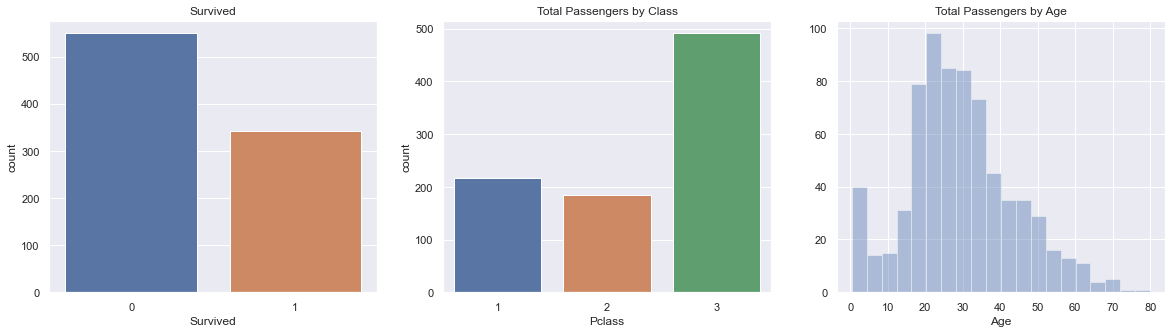

In [207]:
# The categorical histograms we created with matplotlib can be created with the
# "countplot" command in seaborn. The setup is very similar, but easier.

f,ax = plt.subplots(1,3,figsize=(20,5))

sns.countplot('Survived',data=train,ax=ax[0])
ax[0].set_title('Survived')

sns.countplot('Pclass',data=train,ax=ax[1])
ax[1].set_title('Total Passengers by Class')

sns.distplot(train['Age'].dropna(),ax=ax[2],bins=20, kde = False)
ax[2].set_title('Total Passengers by Age')

<div class="alert alert-block alert-success">
<b>Task:</b> 
<ul>
<li> Plot the survival rate (absolut numbers of survival) with respect to the categories Class, Sex, Embarked, Siblings and Parch using [*seaborn*](https://seaborn.pydata.org/). So in total you should get 5 plots. We will take care of the absolute numbers of survival over the feature fare.
<li> Do not forget to give titles to the plots
<li> Hint: Look at the examples here: https://seaborn.pydata.org/generated/seaborn.countplot.html. You can use settings like above f.ex. the figsize and how to refer to axes.
</li>
</ul>
</div>

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

Text(0.5, 1.0, 'Survived by parch')

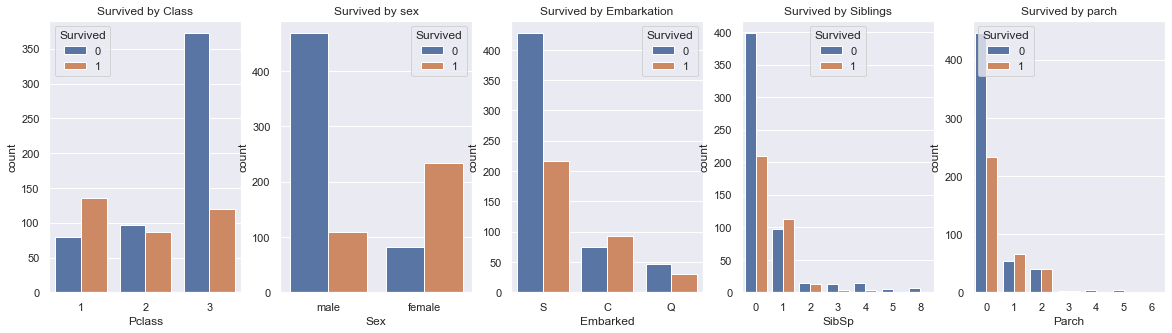

In [208]:
# STUDENT CODE HERE (2pt)
f,ax = plt.subplots(1,5,figsize=(20,5))
sns.countplot('Pclass', hue='Survived',data=train,ax=ax[0])
ax[0].set_title('Survived by Class')

sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Survived by sex')

sns.countplot('Embarked', hue='Survived',data=train,ax=ax[2])
ax[2].set_title('Survived by Embarkation')

sns.countplot('SibSp', hue='Survived',data=train,ax=ax[3])
ax[3].set_title('Survived by Siblings')

sns.countplot('Parch', hue='Survived',data=train,ax=ax[4])
ax[4].set_title('Survived by parch')




# STUDENT CODE until HERE

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Survival Rate by Fare')

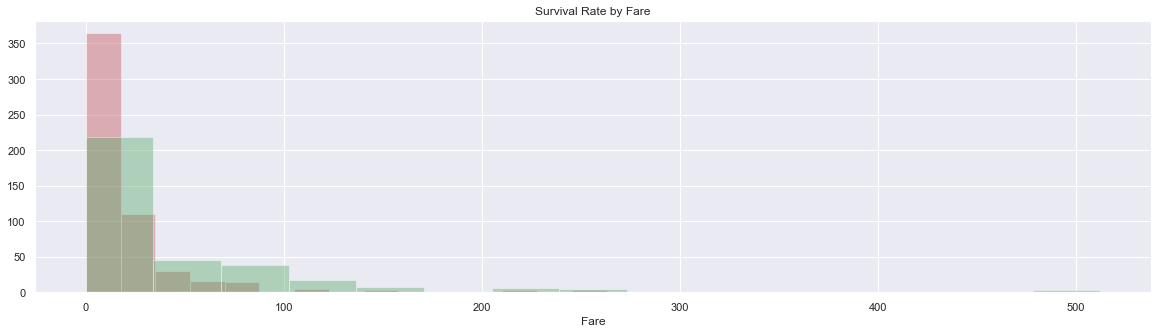

In [209]:
# Using the sns.distplot because of too many bins for usual sns.countplot function
plt.figure(figsize=(20,5))
ax = sns.distplot(train[train['Survived']==0]['Fare'].dropna(),kde=False,color='r',bins=15)
ax = sns.distplot(train[train['Survived']==1]['Fare'].dropna(),kde=False,color='g',bins=15)
ax.set_title('Survival Rate by Fare')

<div class="alert alert-block alert-success">
<b>Question:</b> Which statements can  be made on the basis of the plots ? 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The survivalrate of females was higher than males. The higher the fare is the higher the survivalrate become. Same for the class</div>

## Task 1.2 Cleaning up the Data

The most datasets out of real world applications are messy. They include missing values, outliers and invalid data. In order to improve the data quality these values have to be replaced. The resulting gap in the dataset can be closed by interpolation or by dropping the respective entries.

### 1.2.1 Detecting and Filtering Outliers

Outliers that are either very large or small skew the overall view of the data. One way of detecting outliers could be the use of the standard deviation. If we assume that the data is normally distributed, then 95 percent of the data is within 1.96 standard deviations of the mean. So we can drop the values either above or below that range.

<img src="images/outlier.png" />
<p style="text-align: center;">
    Fig. 1 - outlier detection using normal distribution
</p>

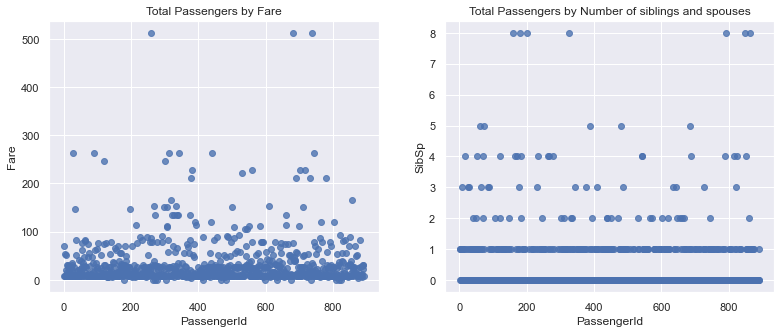

In [210]:
f,ax = plt.subplots(1,2,figsize=(13,5))

# The outliers in Fare (Fare paid by the passenger)
sns.regplot(x=train['PassengerId'], y=train['Fare'], fit_reg=False, ax=ax[0])
# SibSp(Number of siblings and spouses of the passenger aboard)
sns.regplot(x=train['PassengerId'], y=train['SibSp'], fit_reg=False, ax=ax[1])

ax[0].set_title('Total Passengers by Fare')
ax[1].set_title('Total Passengers by Number of siblings and spouses')

plt.show()

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the <code>detect_outliers_sd()</code> function by using its descriptive comments.


</div>

In [211]:
# Outlier detection Method 1 using Standard Deviation
def detect_outliers_sd(df: pd.DataFrame, n_outlier_tolerance: int, features: List[str]) -> List[int]:
    #1. Calculate the mean and standard deviation (std) of our data df
    #2. Add 1.96*std to the mean. Any number greater than this is a suspected outlier
    #3. Subtract 1.96*std from the mean value. Any number less than this is a suspected outlier
    
    
    outlier_indices = []
    for col in features:
        mean: float # Mean
        std: float # Standard deviation
        top: float # Upper bound
        bot: float # Lower bound

        # STUDENT CODE HERE (2pt)
        mean = df[col].mean()
        std = df[col].std()
        top = mean+1.96*std
        bot = mean-1.96*std
        # STUDENT CODE until HERE
    
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < bot) | (df[col] > top)].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n_outlier_tolerance]
    
    return multiple_outliers   

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the <code>detect_outliers_iqr()</code> function by using its descriptive comments.

</li>
</ul>
</div>

In [212]:
# Outlier detection Method 2 using Interquartile Ranges 
def detect_outliers_iqr(df: pd.DataFrame, n_outlier_tolerance: int, features: List[str]) -> List[int]:
    #1. Calculate the interquartile range (IQR) for our data df 
    #2. Multiply the IQR by the number 1.5
    #3. Add 1.5*IQR to the third quartile. Any number greater than this is a suspected outlier
    #4. Substract 1.5*IQR from the first quartile. Any number less than this is a suspected outlier
    #5. Add the rule to determine the indices of outliers as well!!
    
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # STUDENT CODE HERE (3pt)
        q75, q25 = np.percentile(df[col], [75 ,25])
        iqr = q75-q25
        iqr_15= iqr*1.5
        top = iqr_15 + q75
        bot = iqr_15 - q75
        # STUDENT CODE until HERE
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < bot) | (df[col] > top)].index
        
        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n_outlier_tolerance]
    

    return multiple_outliers

In [213]:
# Call the detect outlier function and get the outliers ;)
outliers = detect_outliers_iqr(train, 2, ['Age','SibSp','Parch','Fare'])
train.loc[outliers]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C


In [214]:
# Drop the outliers
train = train.drop(outliers, axis = 0).reset_index(drop=True)

### 1.2.2 Complementary functions

In the most cases Machine Learning algorithms cannot work with missing values. Therefore, we have to create a few functions
to solve that problem.

In [215]:
# The .info function shows how complete or incomplete the datasets train/test are. 
print(train.isnull().sum())
print('-'*30)
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


<div class="alert alert-block alert-info">
<b>Note:</b> We can complete missing data by calculating:
<ul>
<li> Mean
<li> Median
<li> Mean + Randomized Standard Deviation
</li>
</ul>
<br>
Before we can complete the missing data, we should decide which method is best based on the description of the data.
</div>

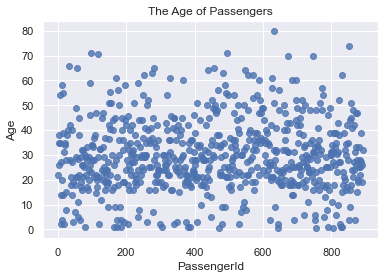

In [216]:
# The outliers in Age 
sns.regplot(x=train['PassengerId'], y=train['Age'], fit_reg=False)
plt.title('The Age of Passengers')
plt.show()

In [217]:
# Fills the missing data in Age by using mean + randomized standard deviation. 

for dataset in datasets:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)  
    df_age = dataset['Age'].copy()
    df_age[np.isnan(df_age)] = [age_null_random_list]
    dataset['Age'] = df_age.astype(int)

In [218]:
# The Description of Fare
print (f'median {train["Fare"].median():>10}')
train['Fare'].describe()

median       13.5


count    864.000000
mean      28.484215
std       42.023831
min        0.000000
25%        7.895800
50%       13.500000
75%       29.268750
max      512.329200
Name: Fare, dtype: float64

In [219]:
# Fills the missing data in Age using median standard deviation.
for dataset in datasets:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


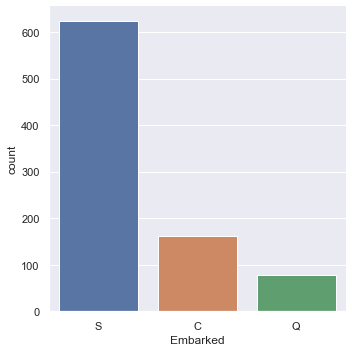

In [220]:
sns.catplot('Embarked',data=train,kind='count')
plt.show()

In [221]:
# Replaces Missing Values with Southampton (S) for Embarked class
for dataset in datasets:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [222]:
# Updates the dataframes
train = datasets[0]
test = datasets[1]
# any: Can detect if a cell matches a condition very quickly
print(train.isnull().any())
print('-'*30)
print(test.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool
------------------------------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
Survived       False
dtype: bool


## Task 2: Feature Engineering

Qualitative data is often nominal (e.g. names) or categorical (e.g. sex). Those can't be ordered and are difficult to evaluate. Therefore we want to convert all our variables to quantitiative data, i.e. numerical or ordinal values.

We can convert the names to attribute based on their length:

In [223]:
for dataset in datasets:
    try:
        dataset['Name_length'] = train['Name'].apply(len)
    except:
        print('Name_length feature is located in the data frame')
        
train['Name_length'].head()

0    23
1    51
2    22
3    44
4    24
Name: Name_length, dtype: int64

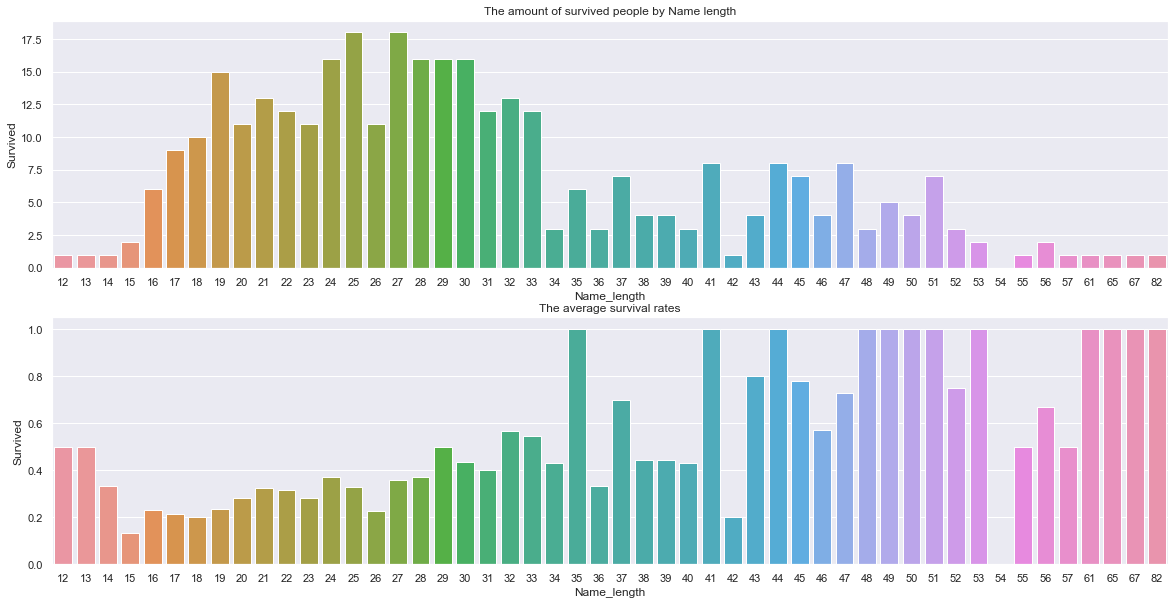

In [224]:
fig, ax = plt.subplots(2,1,figsize=(20,10))

# The amount of survived people by Name length.
sum_Name = train[['Name_length', 'Survived']].groupby(['Name_length'],as_index=False).sum()
sns.barplot(x='Name_length', y='Survived', data=sum_Name, ax = ax[0])
ax[0].set_title('The amount of survived people by Name length')

# The amount of survived people by Name length.
average_Name = train[['Name_length', 'Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=average_Name, ax = ax[1])
ax[1].set_title('The average survival rates')

plt.show()

<div class="alert alert-block alert-success">
<b>Question:</b> What do you conclude from the graphics above ?
</div>

<div class="alert alert-block alert-success">
<b>Answer:Many people have a name length between 19 and 30 letters. It also seems like if your name is longer you are more likely to survive.</b></div>

It can also be helpful to create meaningful "bins" for attributes. Therefore we will divide the Name_length feature into small classes.

In [225]:
for dataset in datasets:
    dataset.loc[ dataset['Name_length'] <= 23, 'Name_length']= 0
    dataset.loc[(dataset['Name_length'] > 23) & (dataset['Name_length'] <= 28), 'Name_length']= 1
    dataset.loc[(dataset['Name_length'] > 28) & (dataset['Name_length'] <= 40), 'Name_length']= 2
    dataset.loc[ dataset['Name_length'] > 40, 'Name_length'] = 3
train['Name_length'].value_counts()


0    360
1    240
2    201
3     90
Name: Name_length, dtype: int64

In [226]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


<div class="alert alert-block alert-success">
<b>Task:</b> In the next step: You are going to map the gender feature.

<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set (list of panda dataframes)</li>
  <li>Use np.where to convert females to 1 and males to 0</li>
  <li>Look if your conversion worked out as planned (<code>.head()</code> method) </li>

</li>
</ul>
</div>

In [227]:
datasets[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [228]:
# STUDENT CODE HERE (2pt)
#print(datasets[0][0:5])
for dataset in datasets:
    
    try:
        dataset['Sex']=np.where(dataset['Sex']=='male',0,1)
    except:
        print('Already converted')
    #dataset=np.where(dataset=='female',1,dataset)
    #dataset=pd.DataFrame(dataset)
    #datasets[i]=dataset
print(datasets[0].head())

# STUDENT CODE until HERE

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

             Ticket     Fare Cabin Embarked  Name_length  
0         A/5 21171   7.2500   NaN        S            0  
1          PC 17599  71.2833   C85        C            3  
2  STON/O2. 3101282   7.9250   NaN        S            0  
3            113803  53.1000  C123        S            3  
4      

Have a look on the age feature!

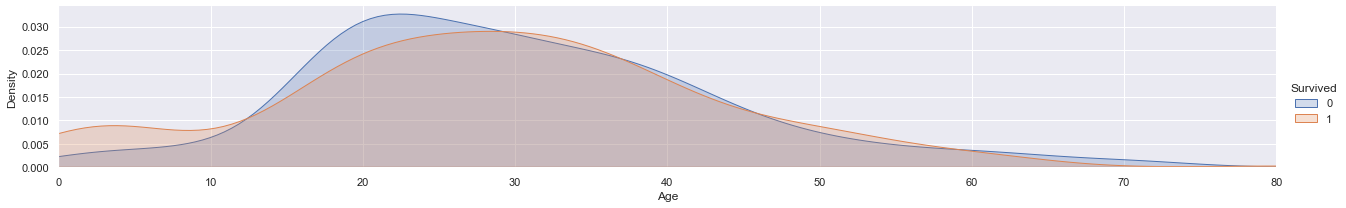

In [229]:
#Plots distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = 'Survived', aspect=6 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

<div class="alert alert-block alert-success">
<b>Question:</b> Which statements can be made about the graphic/plot above with respect to building some bins out of the feature age ? 
</div>

<div class="alert alert-block alert-success">
<b>Answer:</b>The survival rate is much higher for people under 14 years and its the oposite for people being 14 to 30 years old </div>

<div class="alert alert-block alert-success">
<b>Task:</b> Try to map the *Age* feature according to the plot and your given answer into an *Age_bin* category:
<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set</li>
  <li>Use <code>.loc()</code> method to find values that lay inside your bins and logical operations </li>
  <li>Use the following thresholds to obtain 6 possible values/intervals for the new Age_bin feature (0/14/30/40/50/60/60+) </li>

</li>
</ul>
</div>

In [230]:
# STUDENT CODE HERE (2pt)
    

for dataset in datasets:
    dataset.loc[ dataset['Age'] <= 14, 'Age_bin']= 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age_bin']= 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age_bin']= 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age_bin']= 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age_bin']= 4
    dataset.loc[(dataset['Age'] > 60) , 'Age']= 5
train['Age_bin'].value_counts()
test['Age_bin'].value_counts()
# STUDENT CODE until HERE

1.0    218
2.0     84
3.0     54
0.0     31
4.0     21
Name: Age_bin, dtype: int64

<div class="alert alert-block alert-success">
<b>Task:</b> 
<b>Use the following instructions:</b> 
<ul>
  <li>The next step is to map the Embarked feature to 0,1,2.</li>
  <li>Hint: Use the function 'replace' for the dataframes in datasets and set the parameter inplace to True </li>


</li>
</ul>
</div>

In [231]:
# STUDENT CODE HERE (1pt)
print(datasets[0][0:5])
for dataset in datasets:
    dataset=dataset.replace('C',0,inplace=True)
for dataset in datasets:
    dataset=dataset.replace('Q',1,inplace=True)
for dataset in datasets:
    dataset=dataset.replace('S',2,inplace=True)
print(datasets[0][0:5])
# STUDENT CODE until HERE

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   38      1      0   
2                             Heikkinen, Miss. Laina    1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   35      1      0   
4                           Allen, Mr. William Henry    0   35      0      0   

             Ticket     Fare Cabin Embarked  Name_length  Age_bin  
0         A/5 21171   7.2500   NaN        S            0      1.0  
1          PC 17599  71.2833   C85        C            3      2.0  
2  STON/O2. 3101282   7.9250   NaN        S            0      1.0  
3            113803  53.1000  

Additionally the data might be skewed. For example, if we look at the *Fare* attribute, we can see it is heavily skewed to the left:

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

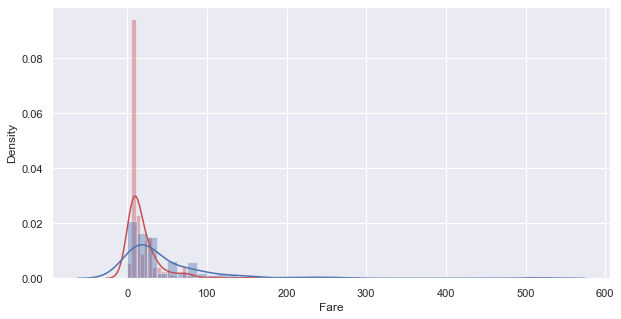

In [232]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train['Fare'][train['Survived'] == 0], color='r')
sns.distplot(train['Fare'][train['Survived'] == 1], color='b')

<div class="alert alert-block alert-success">
<b>Task:</b> Reduce the skewedness of this feature by transforming it with the log-function
<b>Use the following instructions:</b> 
<ul>
  <li>Iterate over train and test set</li>
  <li>Use <code>.map()</code> method and define in it a function lambda that returns the log of the value only if the values is positive, otherwise return 0 </li>
  <li>You can use an if-statement just like there, see also: https://datatofish.com/if-condition-in-pandas-dataframe/</li>

</li>
</ul>
</div>

In [233]:
# STUDENT CODE HERE (3pt)

for dataset in datasets:
    dataset_m = map(lambda x: 0 if np.log(x) < 0 else np.log(x),dataset['Fare'])
    dataset_m = list(dataset_m)
    dataset_m = pd.DataFrame(dataset_m)
    dataset['Fare_log'] = dataset_m
    
# STUDENT CODE until HERE

C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Flosc\anaconda3\envs\lama_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare_log', ylabel='Density'>

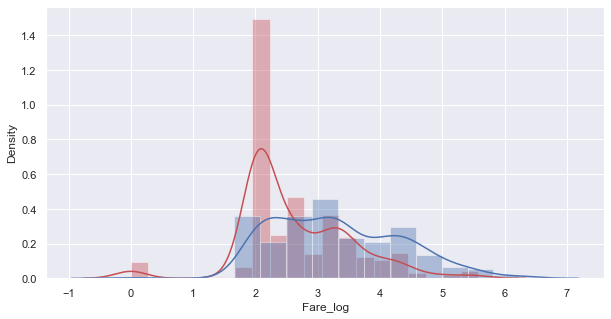

In [234]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(train['Fare_log'][train['Survived'] == 0], color='r')
sns.distplot(train['Fare_log'][train['Survived'] == 1], color='b')

<div class="alert alert-block alert-success">
<b>Question:</b> What can you see if you plot the survival rate over the Fare_log? Analyse the graph!
    <ul>
        <li>Hint: Use the same function we used to plot in the first section.
</div>

<div class="alert alert-block alert-success">
<b>Answer:As expected the more you pay, the more likely you are surviving. With the log plot its much clearer because the fares are closer toghether</b></div>

In [235]:
# Maps Fare_log into the *Fare_bin* feature
for dataset in datasets:
    dataset.loc[ dataset['Fare_log'] <= 2.7, 'Fare_bin'] = 0
    dataset.loc[ dataset['Fare_log'] > 2.7, 'Fare_bin'] = 1
    dataset['Fare_bin'] = dataset['Fare_bin'].astype(int)
train['Fare_bin'].value_counts()

0    457
1    434
Name: Fare_bin, dtype: int64

In [236]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,2,0,1.0,1.981001,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,0,3,2.0,4.266662,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,2,0,1.0,2.070022,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,2,3,2.0,3.972177,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,2,1,2.0,2.085672,0


## Task 3: Feature Selection

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant properties from the data that should not contribute to the overall accurarcy.

<div class="alert alert-block alert-success">
<b>Task:</b> Try to find a feature that is not relevant for our data analysis and drop it with the features Name and Ticket.
<b>Use the following instructions:</b> 
<ul>
  <li>Use the <code>.info()</code> method to look on how complete or incomplete your dataset is</li>
  <li>Determine the third feature beside Name and Ticket and drop all 3 from train and test set</li>


</li>
</ul>
</div>

In [237]:
# Find it

# STUDENT CODE HERE (1pt)
train.info()
train.columns.values
# STUDENT CODE until HERE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Name_length  891 non-null    int64  
 13  Age_bin      869 non-null    float64
 14  Fare_log     891 non-null    float64
 15  Fare_bin     891 non-null    int32  
dtypes: float64(3), int32(3), int64(7), object(3)
memory usage: 101.1+ KB


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_length',
       'Age_bin', 'Fare_log', 'Fare_bin'], dtype=object)

In [238]:
# Remove them

# STUDENT CODE HERE (2pt)
drop_elements = ['Name', 'Ticket', 'Cabin',]
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)
train.head(5)
# STUDENT CODE until HERE

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,0,22,1,0,7.2500,2,0,1.0,1.981001,0
1,2,1,1,1,38,1,0,71.2833,0,3,2.0,4.266662,1
2,3,1,3,1,26,0,0,7.9250,2,0,1.0,2.070022,0
3,4,1,1,1,35,1,0,53.1000,2,3,2.0,3.972177,1
4,5,0,3,0,35,0,0,8.0500,2,1,2.0,2.085672,0


In [239]:
# Look at the final dataset
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_length,Age_bin,Fare_log,Fare_bin
0,1,0,3,0,22,1,0,7.2500,2,0,1.0,1.981001,0
1,2,1,1,1,38,1,0,71.2833,0,3,2.0,4.266662,1
2,3,1,3,1,26,0,0,7.9250,2,0,1.0,2.070022,0
3,4,1,1,1,35,1,0,53.1000,2,3,2.0,3.972177,1
4,5,0,3,0,35,0,0,8.0500,2,1,2.0,2.085672,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,2,0,1.0,2.564949,0
887,888,1,1,1,19,0,0,30.0000,2,1,1.0,3.401197,1
888,889,0,3,1,15,1,2,23.4500,2,2,1.0,3.154870,1
889,890,1,1,0,26,0,0,30.0000,0,0,1.0,3.401197,1


## Task 3.1. Correlation analysis - Multi-variate analysis

<div class="alert alert-block alert-info">
<b>Note:</b> 
<ul>
<li> Basically, correlation measures how closely two variables move in the same direction. Therefore we try to find whether there is a correlation between a feature and a label. In other words as the feature values change does the label change as well, and vice-versa?
<li>  The data may contain a lot of information redundancy distributed among multiple variables, which is a problem called multivariate correlation.

</li>
</ul>
</div>

In order to set up another correlation diagram it is benefical to read the [*seaborn heatmap*](https://seaborn.pydata.org/generated/seaborn.heatmap.html) documentary.
Have a look at this nice correlation diagram.

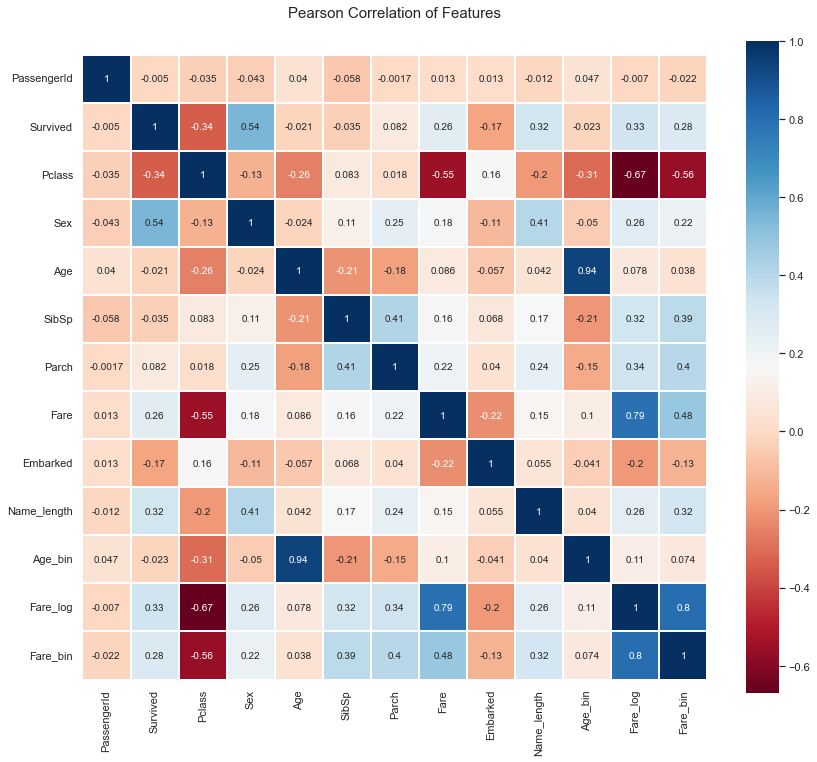

In [240]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

We will drop the following features as well. It is not necessary, but we will reduce dimensions a little bit for the upcoming supervised learning algorithms. 

In [241]:
# Feature selection
drop_elements = ['PassengerId', 'SibSp', 'Age_bin','Embarked']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

Normally you would use the dataset from now on, but because this is a task we saved the prepared dataset by the solution and you can load it in the supervised algorithms.